# Lithology Classification Project

## Outline

#### Section A - Using Unsupervised Learning to Estimate the Number of Clusters for Lithology Identification

1. Data Collection
    * Well Logs data (.las file)
    * Data Summary
2. Feature Selection
    * Extraction of the Conventional Logs from the Well log data
3. Exploratory Data Analysis (on the Selected Features)
    * Statistical Summary
    * Data Understanding, Multivariate Analysis and Visualizations
    * Handling of NAN (missing) values
4. Variable Scaling
    * Aplication Of MinMaxScaler from Sklearn
5. Clustering
    * Kmeans clustering (with a selected number of cluster)
    * Determination of Optimal no. of clusters
    * Integration of the Clusters Labels to the DataFrame
    

#### Section B - Classification Model for Prediction of the Lithology from Rheological Data

1. Data Collection
    * Well Rheological data
    * Data Summary
2. Exploratory Data Analysis
    * Data Understanding (Statistical Summary)
    * Gaining Insights from the Datasets
3. Data Preparation
    * Data Cleaning 
    * Feature Selection
    * Outlier Handling (if any)
    * Data Standardization
4. Merging the Log Data and Drilling Data
    * Merging the Log Data and Drilling Data
5. Model Building (Hybrid - Voting Classifier)
    * support vector machine (SVM)
    * logistic 
    * Random Forest
    * K-nearest neighbor
    * multilayer perceptron models
6. Performance Measurement
    * Accuracy
    * f1_score
    * Precision score
    * Recall_score, etc.
7. Conclusion and Recommendation

### Import of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lasio
import missingno as msno
from matplotlib.patches import Patch

### 1. Data Collection

data_source: 58-32_main submission

In [2]:
# Well log Data (.las file)
las = lasio.read('58-32_main.las')

In [3]:
las_df = las.df()

##### Data Summary

In [4]:
las_df = las_df.reset_index()

In [5]:
las_df.head()

,DEPT,AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,AO60,...,SPAR,STIT,TENS,TNPH,HTNP_SAN,ATCO10,ATCO20,ATCO30,ATCO60,ATCO90
0,10.5,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
1,11.0,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
2,11.5,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
3,12.0,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
4,12.5,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,1.7824,...,NaN,0.0,940.9999,NaN,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664


In [6]:
las_df.columns

Index(['DEPT', 'AF10', 'AF20', 'AF30', 'AF60', 'AF90', 'AO10', 'AO20', 'AO30',
       'AO60', 'AO90', 'AT10', 'AT20', 'AT30', 'AT60', 'AT90', 'AORT', 'AORX',
       'CDF', 'CFTC', 'CNTC', 'CTEM', 'DCAL', 'DNPH', 'DPHZ', 'DSOZ', 'ECGR',
       'ED', 'GDEV', 'GR', 'GR_EDTC', 'GTEM', 'HCAL', 'HDRA', 'HDRB', 'HGR',
       'HMIN', 'HMNO', 'HNPO', 'HPRA', 'HTNP', 'ND', 'NPHI', 'NPOR', 'PEFZ',
       'PXND_HILT', 'RHOZ', 'RSOZ', 'RWA_HILT', 'RXO8', 'RXOZ', 'SP', 'SPAR',
       'STIT', 'TENS', 'TNPH', 'HTNP_SAN', 'ATCO10', 'ATCO20', 'ATCO30',
       'ATCO60', 'ATCO90'],
      dtype='object')

### 2. Feature Selection

Extraction of the Conventional Logs from the Well log data

In [7]:
# Renaming some features
las_df = las_df.rename(columns={'DEPT': 'DEPTH', 'RHOZ': 'RHOB'})

In [8]:
well_data = las_df[['DEPTH','GR', 'RHOB', 'NPHI', 'SP']].copy()

In [9]:
well_data.head()

,DEPTH,GR,RHOB,NPHI,SP
0,10.5,160.0384,2.2207,NaN,NaN
1,11.0,160.0384,2.2207,NaN,NaN
2,11.5,160.0384,2.2207,NaN,NaN
3,12.0,160.0384,2.2207,NaN,NaN
4,12.5,160.0384,2.2207,NaN,NaN


### 3. Exploratory data Analysis

* Statistic Summary

In [10]:
well_data.describe()

,DEPTH,GR,RHOB,NPHI,SP
count,15128.000000,15128.000000,15082.000000,15112.000000,15050.000000
mean,3792.250000,142.765148,2.188006,0.146351,41.073123
std,2183.610886,69.231103,45.014033,0.167891,66.289773
min,10.500000,17.610800,-5525.473100,-0.011600,-181.250000
25%,1901.375000,85.743550,2.428400,0.013700,-0.423175
50%,3792.250000,149.707250,2.568900,0.080200,50.625000
75%,5683.125000,179.402750,2.616875,0.264225,77.421900
max,7574.000000,641.089700,4.628800,0.862100,172.656300


* Data Understanding, Multivariate Analysis and Visualizations

In [11]:
# Overview
well_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15128 entries, 0 to 15127
Data columns (total 5 columns):
DEPTH    15128 non-null float64
GR       15128 non-null float64
RHOB     15082 non-null float64
NPHI     15112 non-null float64
SP       15050 non-null float64
dtypes: float64(5)
memory usage: 591.0 KB


In [12]:
# Sum of Missing values across the data
well_data.isna().sum()

DEPTH     0
GR        0
RHOB     46
NPHI     16
SP       78
dtype: int64

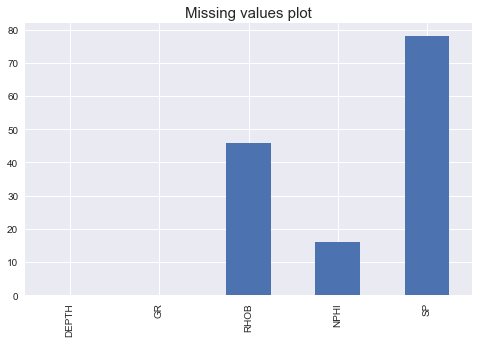

In [13]:
# Visualizing for missing values
plt.style.use('seaborn')
plt.figure(figsize=(8, 5))
well_data.isna().sum().plot(kind='bar')
plt.title('Missing values plot', fontsize=15)
plt.show()

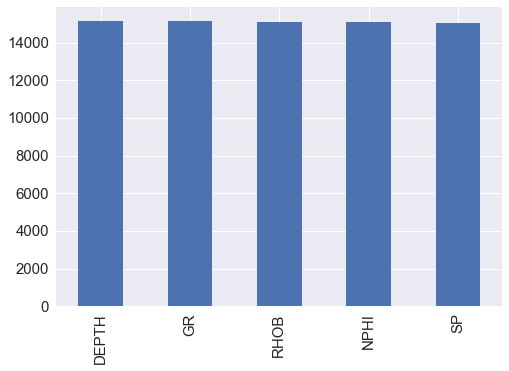

In [14]:
well_data.count().plot(kind='bar', fontsize=15)

In [15]:
# Let's drop the missing values, since there are insignificant
well_data.dropna(inplace=True)

#### Outlier Handling

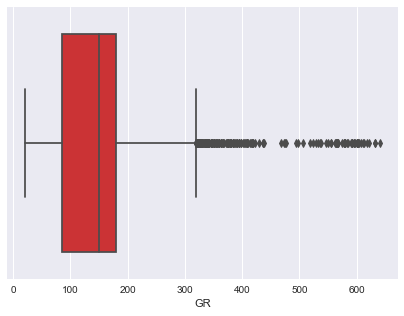

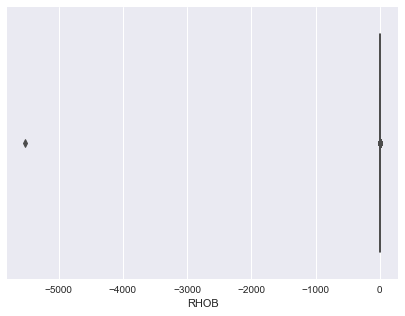

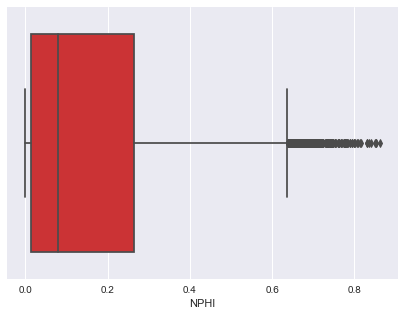

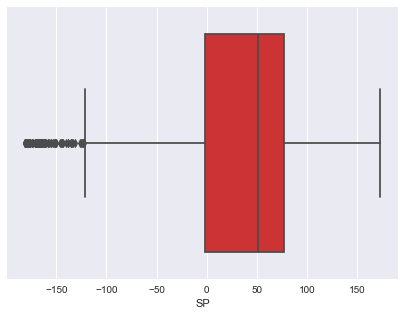

In [16]:
#Create a function to plot box plots of the respective numerical features against the target label
columns = ['GR', 'RHOB', 'NPHI', 'SP']
def plot_boxplots(df_log, cols):
    for col in cols:
        plt.figure(figsize = (7,5))
        sns.boxplot(col, data=df_log, palette="Set1")
        plt.show()

plot_boxplots(well_data, columns)

In [17]:
# Handling Outliers
well_data = well_data[(well_data['GR'] < 400)]
well_data = well_data[(well_data['RHOB'] < 3.5)]
well_data = well_data[(well_data['RHOB'] > 0)]
well_data = well_data[(well_data['NPHI'] > 0)]
well_data = well_data.dropna()

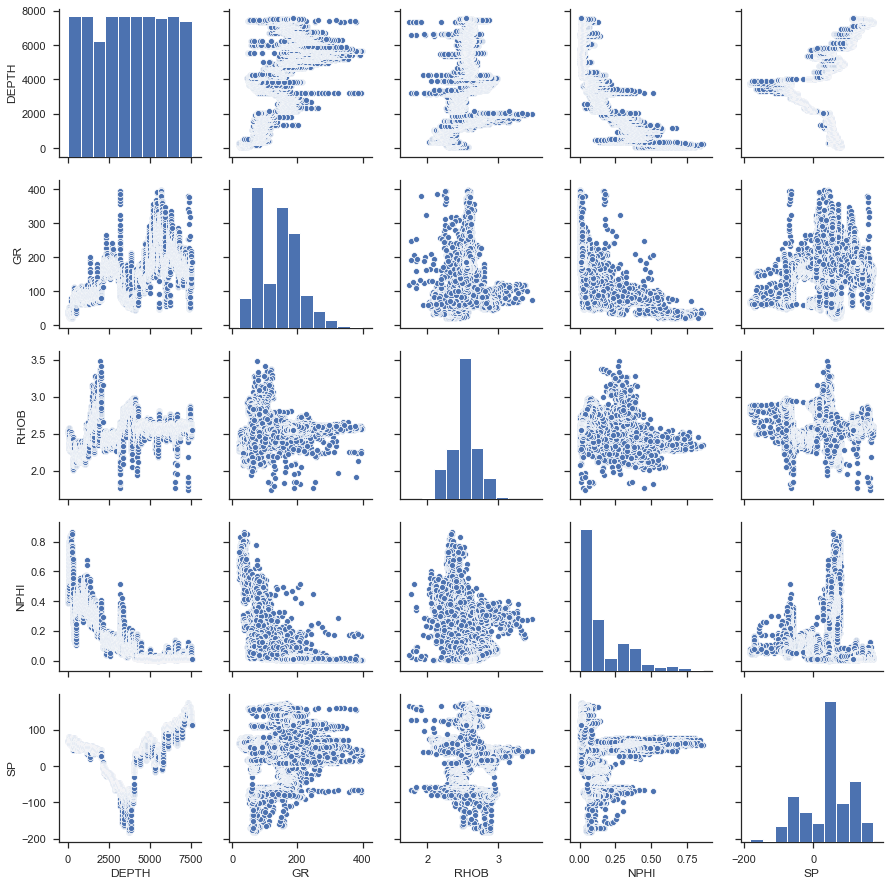

In [18]:
sns.set(style='ticks')
sns.pairplot(well_data)

In [19]:
well_data.shape

(14662, 5)

In [20]:
well_data.describe()

,DEPTH,GR,RHOB,NPHI,SP
count,14662.000000,14662.000000,14662.000000,14662.000000,14662.000000
mean,3815.324956,142.087051,2.531274,0.144003,40.606828
std,2166.834275,63.910958,0.183466,0.167522,66.687575
min,49.500000,20.493500,1.744600,0.000200,-181.250000
25%,1882.125000,85.684400,2.426700,0.013600,-7.482650
50%,3849.250000,151.247850,2.567400,0.076700,50.937500
75%,5690.875000,179.333975,2.613800,0.255875,77.500000
max,7550.500000,398.425100,3.481500,0.862100,172.656300


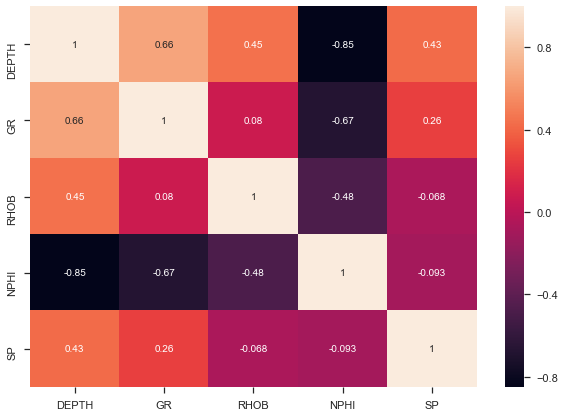

In [21]:
# Heatmap to show to correlation of the features
plt.figure(figsize=(10, 7))
sns.heatmap(well_data.corr(), annot=True, annot_kws={'size':10})
plt.show()

In [22]:
well_data.columns

Index(['DEPTH', 'GR', 'RHOB', 'NPHI', 'SP'], dtype='object')

In [23]:
# Make a copy of the data 
data = well_data.copy()

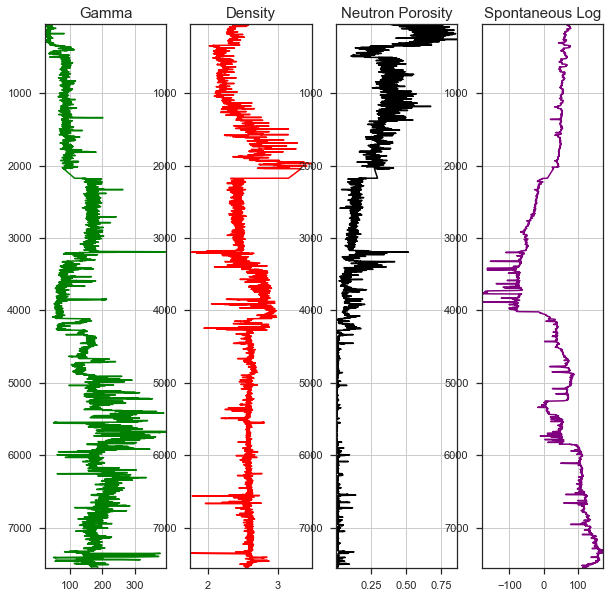

In [24]:
# Making well Log plots

# define initialize our subplot with the size
fig = plt.subplots(figsize=(10,10))
top = data['DEPTH'].min()
bot = data['DEPTH'].max()

# we define the various axes 
ax1 = plt.subplot2grid((1, 4), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 4), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 4), (0,2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 4), (0,3), rowspan=1, colspan=1)

# Gamma ray track
ax1.plot('GR', 'DEPTH', data=data, color='green')
ax1.set_title('Gamma', fontsize=15)
ax1.set_xlim(data['GR'].min(), data['GR'].max())
ax1.set_ylim(bot, top)
ax1.grid()

# Density track
ax2.plot('RHOB', 'DEPTH', data=data, color='red')
ax2.set_title('Density', fontsize=15)
ax2.set_xlim(data['RHOB'].min(), data['RHOB'].max())
ax2.set_ylim(bot, top)
ax2.grid()

# Neutron Porosity Log Track
ax3.plot('NPHI', 'DEPTH', data=data, color='black')
ax3.set_title('Neutron Porosity', fontsize=15)
ax3.set_xlim(data['NPHI'].min(), data['NPHI'].max())
ax3.set_ylim(bot, top)
ax3.grid()

# Spontaneous Log Track
ax4.plot('SP', 'DEPTH', data=data, color='purple')
ax4.set_title('Spontaneous Log', fontsize=15)
ax4.set_xlim(data['SP'].min(), data['SP'].max())
ax4.set_ylim(bot, top)
ax4.grid()

### 4. Variables Scaling

* Application Of MinMaxScaler from Sklearn

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(data)


data_scaled = pd.DataFrame(scaled_data, columns=data.columns)

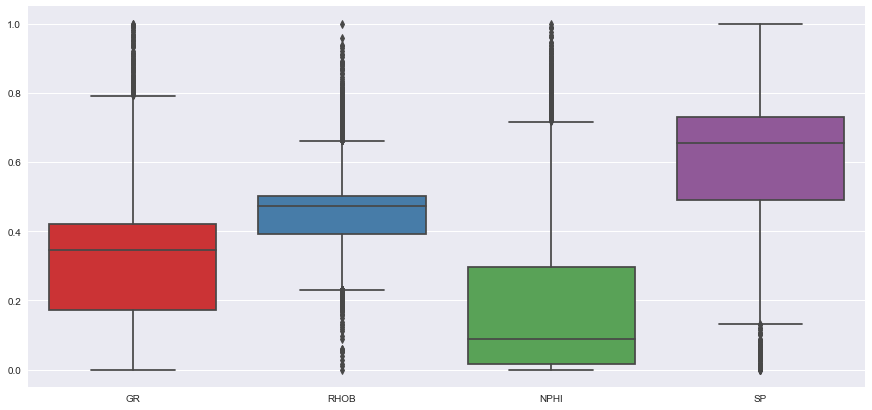

In [26]:
#Visualize data distribution
plt.style.use('seaborn')
plt.figure(figsize = (15,7))
sns.boxplot(data=data_scaled[[ 'GR', 'RHOB', 'NPHI', 'SP']], palette = "Set1")

In [27]:
data_scaled.describe()

,DEPTH,GR,RHOB,NPHI,SP
count,14662.000000,14662.000000,14662.000000,14662.000000,14662.000000
mean,0.502043,0.321734,0.452918,0.166844,0.626880
std,0.288873,0.169107,0.105629,0.194364,0.188433
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244317,0.172494,0.392711,0.015547,0.490998
50%,0.506566,0.345974,0.473718,0.088757,0.656071
75%,0.752083,0.420289,0.500432,0.296641,0.731126
max,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Clustering

* Determining Optimal Number of clusters

For n_clusters = 2 The average silhouette_score is : 0.4908522652164892
For n_clusters = 3 The average silhouette_score is : 0.5063697375515153
For n_clusters = 4 The average silhouette_score is : 0.46092282739586865
For n_clusters = 5 The average silhouette_score is : 0.47823752497893424
For n_clusters = 6 The average silhouette_score is : 0.4717919371595686


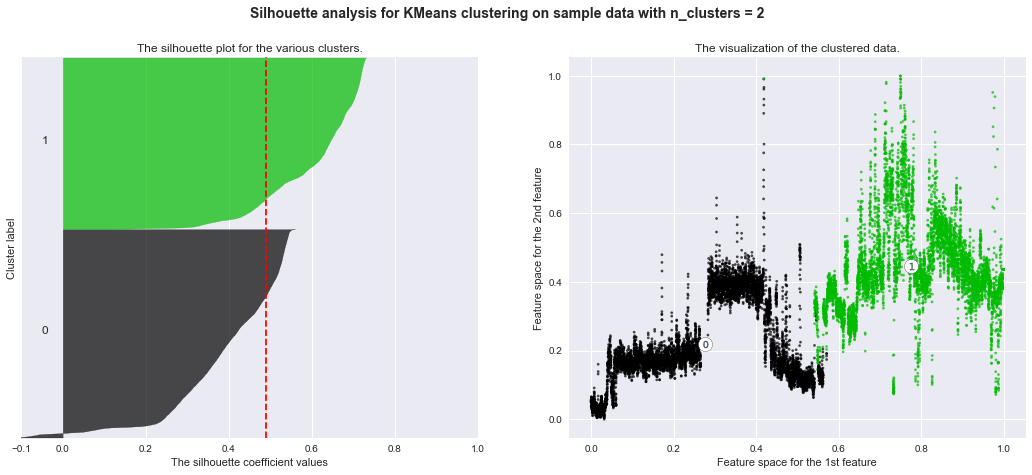

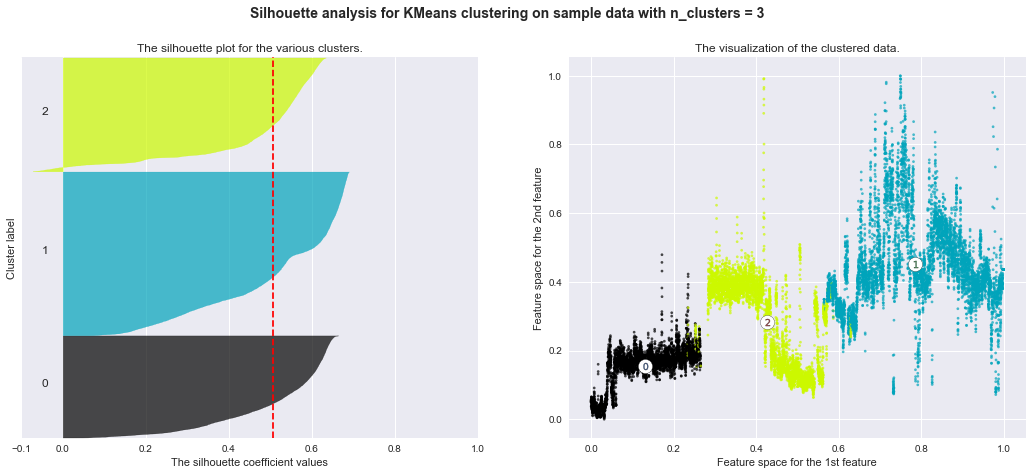

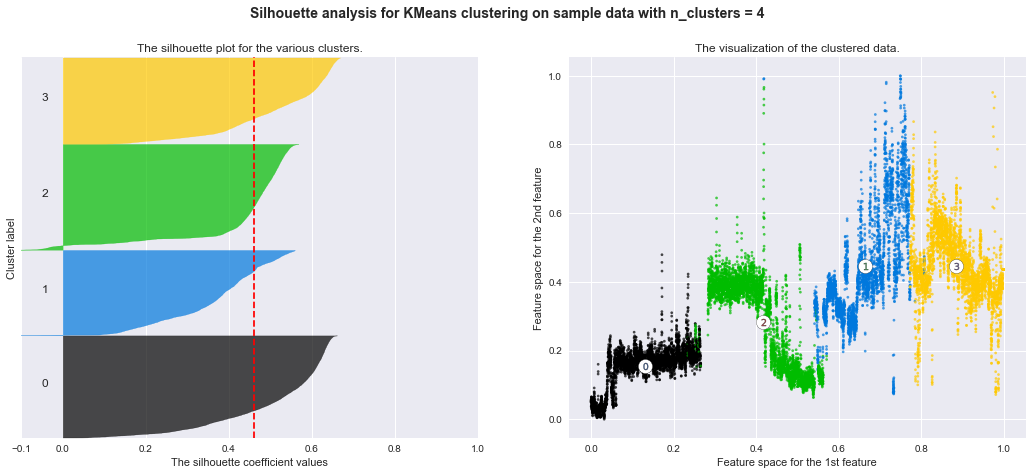

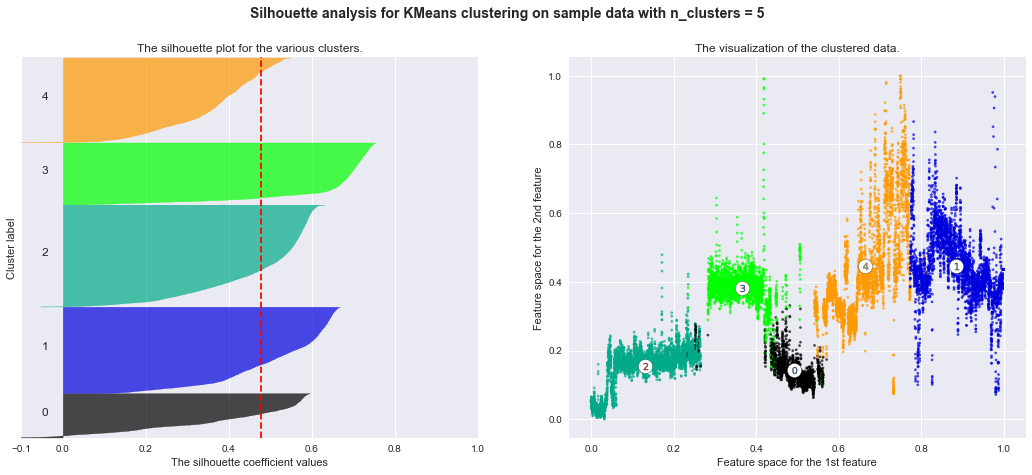

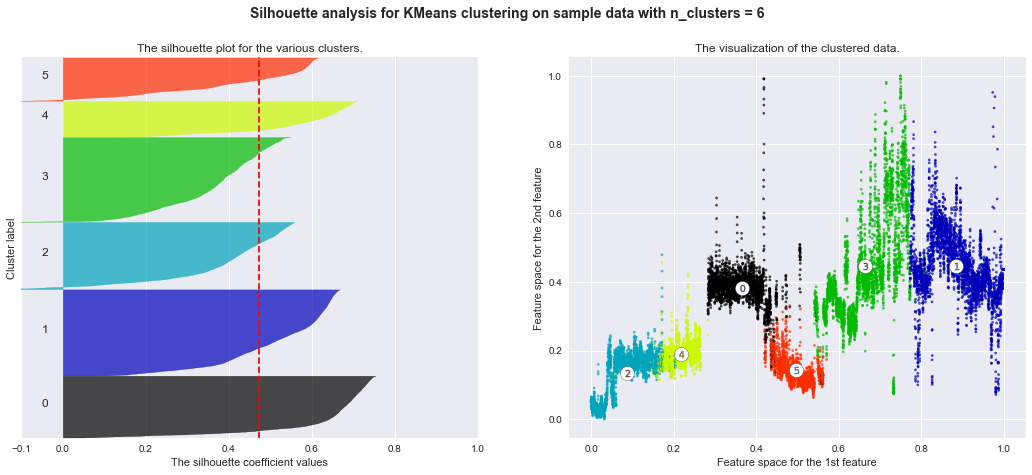

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = data_scaled.iloc[:,:].values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From the Silhouette Ananlysis and the score, n_clusters = 3 performed better. 

Using the elbow plot to acertain the claim by Silhouette analysis. 

In [29]:
# Determining Optimal Clusters using Sum of Squares Within(SSW)

SSW = np.zeros(10)

for k in range(1, 10):
    
    kmeans_data = KMeans(n_clusters = k, random_state=42).fit(data_scaled)
    
    SSW[k] = kmeans_data.inertia_
    
print(f'The SSW values are: \n{SSW[1:10]}')

The SSW values are: 
[2880.68802835 1305.71860467  737.85423574  588.16619634  473.23104255
  375.99306863  301.51618302  244.69412199  219.43296351]


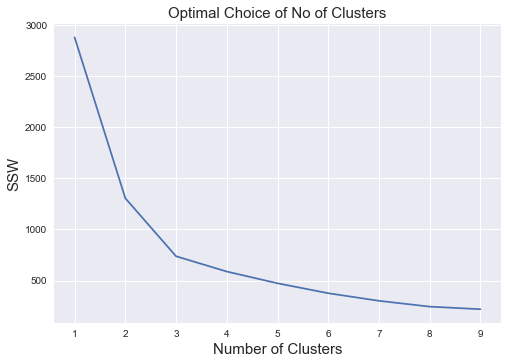

In [30]:
# To know choice of optimal number of clusters

clusters = range(1, 10)

plt.style.use('seaborn')
plt.ylabel('SSW', fontsize=15)
plt.xlabel('Number of Clusters', fontsize=15)
plt.plot(clusters, SSW[1:10])
plt.title('Optimal Choice of No of Clusters', fontsize=15)
plt.show()

* From the plot above, the elbow is formed best at the n = 3. Although it started from 2. But 3 gave the best curve.

* It affirms the claim from the Silhouette Analysis. n_cluster = 2 score is cool, but the n_cluster = 3 performed better

In [87]:
data1_scaled = data_scaled.copy()

In [88]:
# Applying Kmeans Clustering, with n_cluster=3

data_kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)

cluster_labels = data_kmeans.fit_predict(data1_scaled)

print(data_kmeans.labels_)
print(data_kmeans.cluster_centers_)

[2 2 2 ... 1 1 1]
[[0.42722543 0.28435752 0.47402457 0.13265387 0.39367236]
 [0.78529149 0.45254352 0.48208249 0.01749029 0.76656776]
 [0.13157029 0.15379081 0.38266995 0.44425101 0.66292977]]


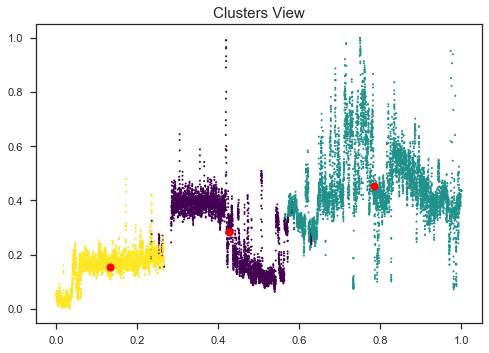

In [89]:
# Make a scatter plot to view clusters
sns.set(style = 'ticks') # Set the background to ticks
plt.scatter(data1_scaled.iloc[:, 0], data1_scaled.iloc[:, 1], c=cluster_labels, s=1, cmap='viridis')
plt.scatter(data_kmeans.cluster_centers_[:, 0], data_kmeans.cluster_centers_[:, 1], c='red', s=50)
plt.title('Clusters View', fontsize=15)
plt.show()

* Integration of the Clusters Labels to the DataFrame

In [90]:
# Adding to the DataFrame

data['Lithology'] = cluster_labels

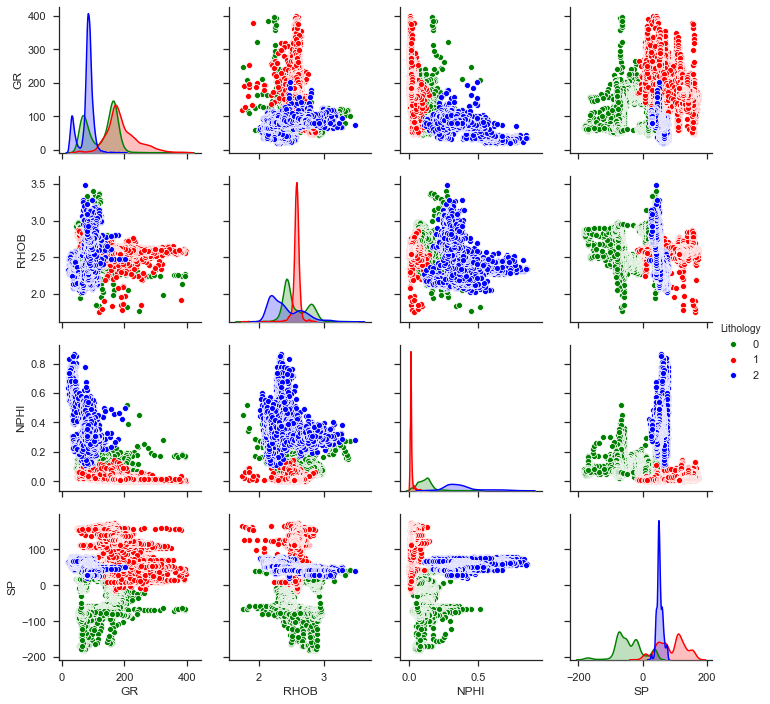

In [91]:
# Making a plot
sns.pairplot(data, vars=['GR', 'RHOB','NPHI','SP'],  hue='Lithology', palette=['green', 'red', 'blue'])

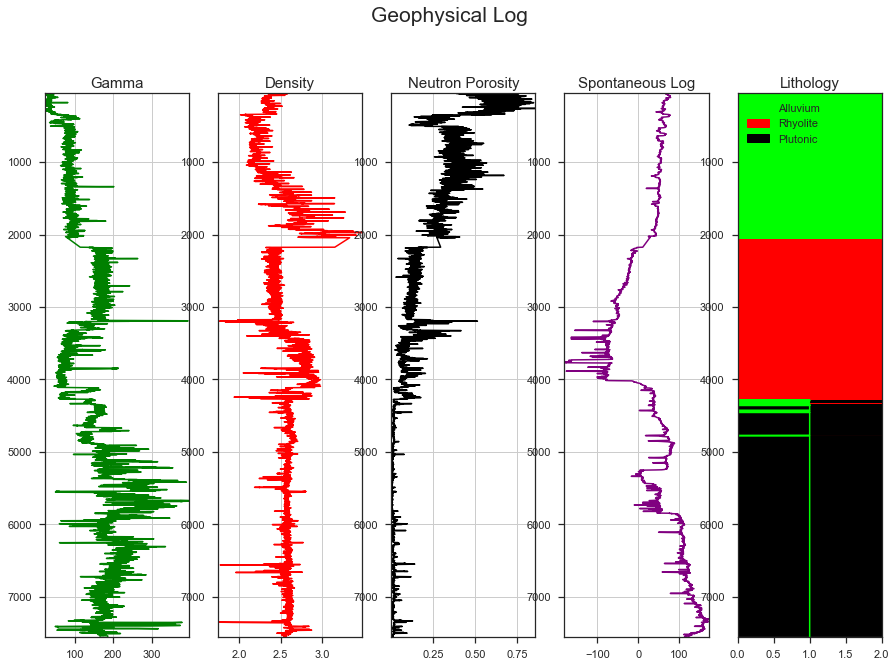

In [96]:
# define initialize our subplot with the size
fig = plt.subplots(figsize=(15,10))
top = data['DEPTH'].min()
bot = data['DEPTH'].max()

legend_elements = [Patch(facecolor='lime', edgecolor='lime', label='Alluvium'),
                       Patch(facecolor='red', edgecolor='red',   label='Rhyolite'),
                       Patch(facecolor='black', edgecolor='black', label='Plutonic')
                      ]
plt.suptitle('Geophysical Log', fontsize=21, y=1)
# we define the various axes 
ax1 = plt.subplot2grid((1, 5), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 5), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 5), (0,2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 5), (0,3), rowspan=1, colspan=1)
ax5 = plt.subplot2grid((1, 5), (0,4), rowspan=1, colspan=1)

# Gamma ray track
ax1.plot('GR', 'DEPTH', data=data, color='green')
ax1.set_title('Gamma', fontsize=15)
ax1.set_xlim(data['GR'].min(), data['GR'].max())
ax1.set_ylim(bot, top)
ax1.grid()

# Density track
ax2.plot('RHOB', 'DEPTH', data=data, color='red')
ax2.set_title('Density', fontsize=15)
ax2.set_xlim(data['RHOB'].min(), data['RHOB'].max())
ax2.set_ylim(bot, top)
ax2.grid()

# Neutron Porosity Log Track
ax3.plot('NPHI', 'DEPTH', data=data, color='black')
ax3.set_title('Neutron Porosity', fontsize=15)
ax3.set_xlim(data['NPHI'].min(), data['NPHI'].max())
ax3.set_ylim(bot, top)
ax3.grid()

# Spontaneous Log Track
ax4.plot('SP', 'DEPTH', data=data, color='purple')
ax4.set_title('Spontaneous Log', fontsize=15)
ax4.set_xlim(data['SP'].min(), data['SP'].max())
ax4.set_ylim(bot, top)
ax4.grid()

# Lithology
ax5.plot('Lithology', 'DEPTH', data=data, color='lime')
ax5.set_title('Lithology', fontsize=15)
ax5.set_xlim(data['Lithology'].min(), data['Lithology'].max())
ax5.set_ylim(bot, top)
ax5.grid()
ax5.fill_betweenx(data.DEPTH, x1 = 0, x2=12, where= data.Lithology == 0,color = 'red')
ax5.fill_betweenx(data.DEPTH, x1 = 0, x2=12, where= data.Lithology == 1,color = 'black')
ax5.fill_betweenx(data.DEPTH, x1 = 0, x2=12, where= data.Lithology == 2,color = 'lime')
ax5.legend(handles=legend_elements, loc='upper left')

#### Hierarchical Clustering

In [97]:
data2_scaled = data_scaled.copy()

In [98]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc_w = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

labels_hc = hc_w.fit_predict(data2_scaled)

In [99]:
# Adding it to the data

data['Lithology_hc'] = labels_hc

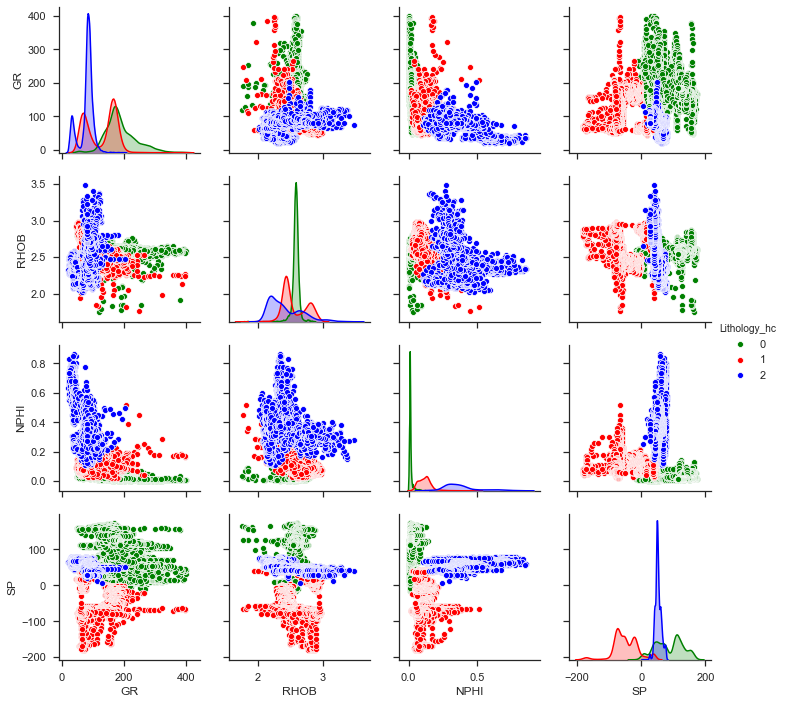

In [100]:
# Making a plot
sns.pairplot(data, vars=['GR', 'RHOB','NPHI','SP'],  hue='Lithology_hc', palette=['green', 'red', 'blue'])

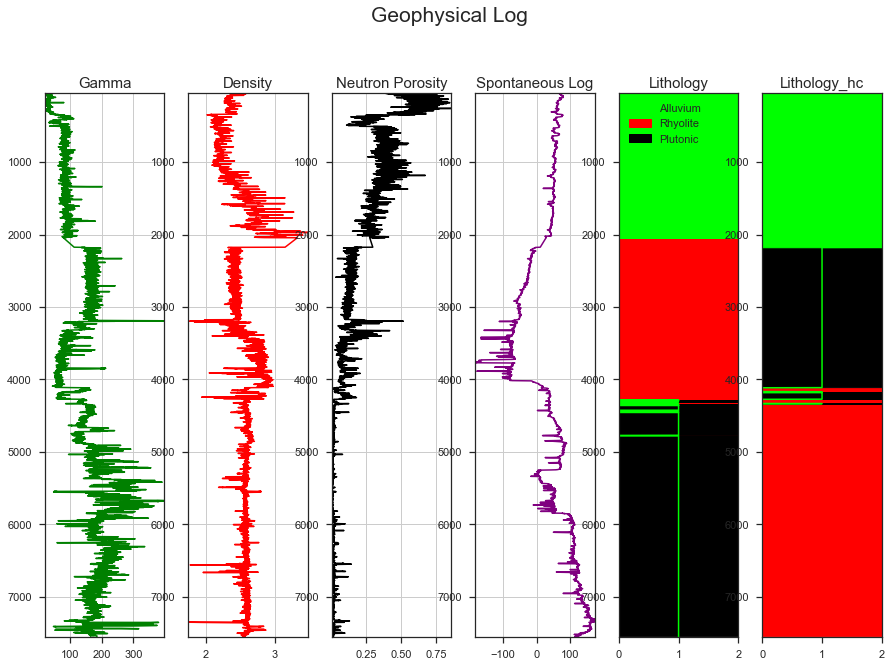

In [101]:
# define initialize our subplot with the size
fig = plt.subplots(figsize=(15,10))
top = data['DEPTH'].min()
bot = data['DEPTH'].max()

legend_elements = [Patch(facecolor='lime', edgecolor='lime', label='Alluvium'),
                       Patch(facecolor='red', edgecolor='red',   label='Rhyolite'),
                       Patch(facecolor='black', edgecolor='black', label='Plutonic')
                      ]
plt.suptitle('Geophysical Log', fontsize=21, y=1)
# we define the various axes 
ax1 = plt.subplot2grid((1, 6), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 6), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 6), (0,2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 6), (0,3), rowspan=1, colspan=1)
ax5 = plt.subplot2grid((1, 6), (0,4), rowspan=1, colspan=1)
ax6 = plt.subplot2grid((1, 6), (0,5), rowspan=1, colspan=1)

# Gamma ray track
ax1.plot('GR', 'DEPTH', data=data, color='green')
ax1.set_title('Gamma', fontsize=15)
ax1.set_xlim(data['GR'].min(), data['GR'].max())
ax1.set_ylim(bot, top)
ax1.grid()

# Density track
ax2.plot('RHOB', 'DEPTH', data=data, color='red')
ax2.set_title('Density', fontsize=15)
ax2.set_xlim(data['RHOB'].min(), data['RHOB'].max())
ax2.set_ylim(bot, top)
ax2.grid()

# Neutron Porosity Log Track
ax3.plot('NPHI', 'DEPTH', data=data, color='black')
ax3.set_title('Neutron Porosity', fontsize=15)
ax3.set_xlim(data['NPHI'].min(), data['NPHI'].max())
ax3.set_ylim(bot, top)
ax3.grid()

# Spontaneous Log Track
ax4.plot('SP', 'DEPTH', data=data, color='purple')
ax4.set_title('Spontaneous Log', fontsize=15)
ax4.set_xlim(data['SP'].min(), data['SP'].max())
ax4.set_ylim(bot, top)
ax4.grid()

# Lithology
ax5.plot('Lithology', 'DEPTH', data=data, color='lime')
ax5.set_title('Lithology', fontsize=15)
ax5.set_xlim(data['Lithology'].min(), data['Lithology'].max())
ax5.set_ylim(bot, top)
ax5.grid()
ax5.fill_betweenx(data.DEPTH, x1 = 0, x2=12, where= data.Lithology == 0,color = 'red')
ax5.fill_betweenx(data.DEPTH, x1 = 0, x2=12, where= data.Lithology == 1,color = 'black')
ax5.fill_betweenx(data.DEPTH, x1 = 0, x2=12, where= data.Lithology == 2,color = 'lime')
ax5.legend(handles=legend_elements, loc='upper left')


# Lithology_hc
ax6.plot('Lithology_hc', 'DEPTH', data=data, color='lime')
ax6.set_title('Lithology_hc', fontsize=15)
ax6.set_xlim(data['Lithology_hc'].min(), data['Lithology_hc'].max())
ax6.set_ylim(bot, top)
ax6.grid()
ax6.fill_betweenx(data.DEPTH, x1 = 0, x2=12, where= data.Lithology_hc == 0,color = 'red')
ax6.fill_betweenx(data.DEPTH, x1 = 0, x2=12, where= data.Lithology_hc == 1,color = 'black')
ax6.fill_betweenx(data.DEPTH, x1 = 0, x2=12, where= data.Lithology_hc == 2,color = 'lime')

In [42]:
data.head()

,DEPTH,GR,RHOB,NPHI,SP,Lithology,Lithology_hc
78,49.5,39.2458,2.5055,0.4427,67.2656,2,2
79,50.0,40.4446,2.5265,0.4136,68.4375,2,2
80,50.5,41.3580,2.5242,0.4147,68.4375,2,2
81,51.0,40.5589,2.5129,0.4529,68.8281,2,2
82,51.5,42.3286,2.5130,0.4516,69.6875,2,2


In [43]:
data.describe()

,DEPTH,GR,RHOB,NPHI,SP,Lithology,Lithology_hc
count,14662.000000,14662.000000,14662.000000,14662.000000,14662.000000,14662.000000,14662.000000
mean,3815.324956,142.087051,2.531274,0.144003,40.606828,0.969172,0.822398
std,2166.834275,63.910958,0.183466,0.167522,66.687575,0.753595,0.830639
min,49.500000,20.493500,1.744600,0.000200,-181.250000,0.000000,0.000000
25%,1882.125000,85.684400,2.426700,0.013600,-7.482650,0.000000,0.000000
50%,3849.250000,151.247850,2.567400,0.076700,50.937500,1.000000,1.000000
75%,5690.875000,179.333975,2.613800,0.255875,77.500000,2.000000,2.000000
max,7550.500000,398.425100,3.481500,0.862100,172.656300,2.000000,2.000000


In [44]:
data['DEPTH'].iloc[71]

85.0

# Section B
### Classification Model for Prediction of the Lithology from Rheological Data

### 1. Data Collection
* Well Rheological Data

In [45]:
data_well = pd.read_csv('Well_58-32_processed_pason_log_drilling data.csv')

data_well.head()

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
0,85.18,25.96,56.80,17.31,0.0,0.0,93.49,34.16,90.87,32.71,...,61.57,151.09,1109.58,4200.22,101.61,-1230.69,-8485.61,-0.01,-0.03,0.31
1,86.18,26.27,61.14,18.63,0.0,0.0,93.52,34.18,90.83,32.68,...,61.57,151.09,1108.36,4195.60,101.70,-1230.69,-8485.61,-0.01,-0.04,0.31
2,87.23,26.59,18.58,5.66,0.0,0.0,94.25,34.58,90.91,32.73,...,62.12,61.54,1102.87,4174.82,96.81,-1230.69,-8485.61,-0.01,-0.03,0.30
3,88.26,26.90,38.29,11.67,0.0,0.0,94.44,34.69,91.14,32.86,...,61.85,60.23,1101.04,4167.89,96.67,-1230.69,-8485.61,0.00,-0.03,0.31
4,89.36,27.24,394.38,120.20,0.0,0.0,94.48,34.71,91.18,32.88,...,61.85,61.75,1102.46,4173.26,96.63,-1230.69,-8485.61,-0.02,-0.02,0.31


In [46]:
data_well.columns

Index(['Depth(ft)', 'Depth(m)', 'ROP(1 ft)', 'ROP(1 m)',
       'weight on bit (k-lbs)', 'weight on bit (kg)', 'Temp Out( degF)',
       'Temp Out( degC)', 'Temp In(degF)', 'Temp In(degC)', 'Pit Total (bbls)',
       'Pit Total (m3)', 'Pump Press (psi)', 'Pump Press (KPa)',
       'Hookload (k-lbs)', 'Hookload (kg)', 'Surface Torque (psi)',
       'Surface Torque (KPa)', 'Rotary Speed (rpm)', 'Flow In (gal/min)',
       'Flow In(liters/min)', 'Flow Out %', 'WH Pressure (psi)',
       'WH Pressure (KPa)', 'H2S Floor', 'H2S Cellar', 'H2S Pits'],
      dtype='object')

### 2. Exploratory Data Analysis

* Data Understanding

In [47]:
# Statistical Summary
data_well.describe()

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
count,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,...,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000
mean,3835.043935,1168.864378,42.010324,12.804158,23.116699,10483.764002,126.059506,52.255297,118.315593,47.953090,...,903.132323,54.947292,716.254127,2711.315497,79.692834,-35.760875,-246.571280,-0.027372,0.004303,0.148833
std,2147.503980,654.527243,75.921118,23.139621,9.119495,4135.825227,12.259879,6.811023,11.933137,6.629486,...,335.832421,25.947654,141.784179,536.711275,11.909399,222.669489,1535.306539,0.042453,0.025282,0.115290
min,85.180000,25.960000,0.000000,0.000000,0.000000,0.000000,84.070000,28.930000,85.000000,29.440000,...,0.000000,0.000000,0.000000,0.000000,0.690000,-1231.830000,-8493.470000,-0.100000,-0.080000,-0.060000
25%,1970.395000,600.545000,11.400000,3.470000,18.310000,8303.850000,116.130000,46.740000,108.850000,42.695000,...,806.715000,38.090000,620.260000,2347.940000,72.650000,2.920000,20.130000,-0.070000,-0.010000,0.060000
50%,3851.850000,1173.990000,17.990000,5.480000,23.830000,10807.260000,124.860000,51.590000,117.220000,47.340000,...,967.440000,50.380000,700.210000,2650.580000,80.710000,5.940000,40.960000,-0.010000,0.000000,0.140000
75%,5691.585000,1734.710000,44.295000,13.500000,29.680000,13460.320000,136.490000,58.050000,126.860000,52.700000,...,1084.450000,75.965000,824.610000,3121.485000,88.845000,8.260000,56.950000,0.000000,0.020000,0.220000
max,7536.250000,2296.940000,2977.910000,907.620000,47.050000,21337.870000,151.700000,66.500000,146.310000,63.510000,...,1887.230000,271.580000,3317.510000,12558.140000,111.210000,17.410000,120.040000,0.780000,0.070000,0.720000


In [48]:
# Gaining Insight from the dataset
data_well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 27 columns):
Depth(ft)                7311 non-null float64
Depth(m)                 7311 non-null float64
ROP(1 ft)                7311 non-null float64
ROP(1 m)                 7311 non-null float64
weight on bit (k-lbs)    7311 non-null float64
weight on bit (kg)       7311 non-null float64
Temp Out( degF)          7311 non-null float64
Temp Out( degC)          7311 non-null float64
Temp In(degF)            7311 non-null float64
Temp In(degC)            7311 non-null float64
Pit Total (bbls)         7311 non-null float64
Pit Total (m3)           7311 non-null float64
Pump Press (psi)         7311 non-null float64
Pump Press (KPa)         7311 non-null float64
Hookload (k-lbs)         7311 non-null float64
Hookload (kg)            7311 non-null float64
Surface Torque (psi)     7311 non-null float64
Surface Torque (KPa)     7311 non-null float64
Rotary Speed (rpm)       7311 non-null float64


In [49]:
data_well.shape

(7311, 27)

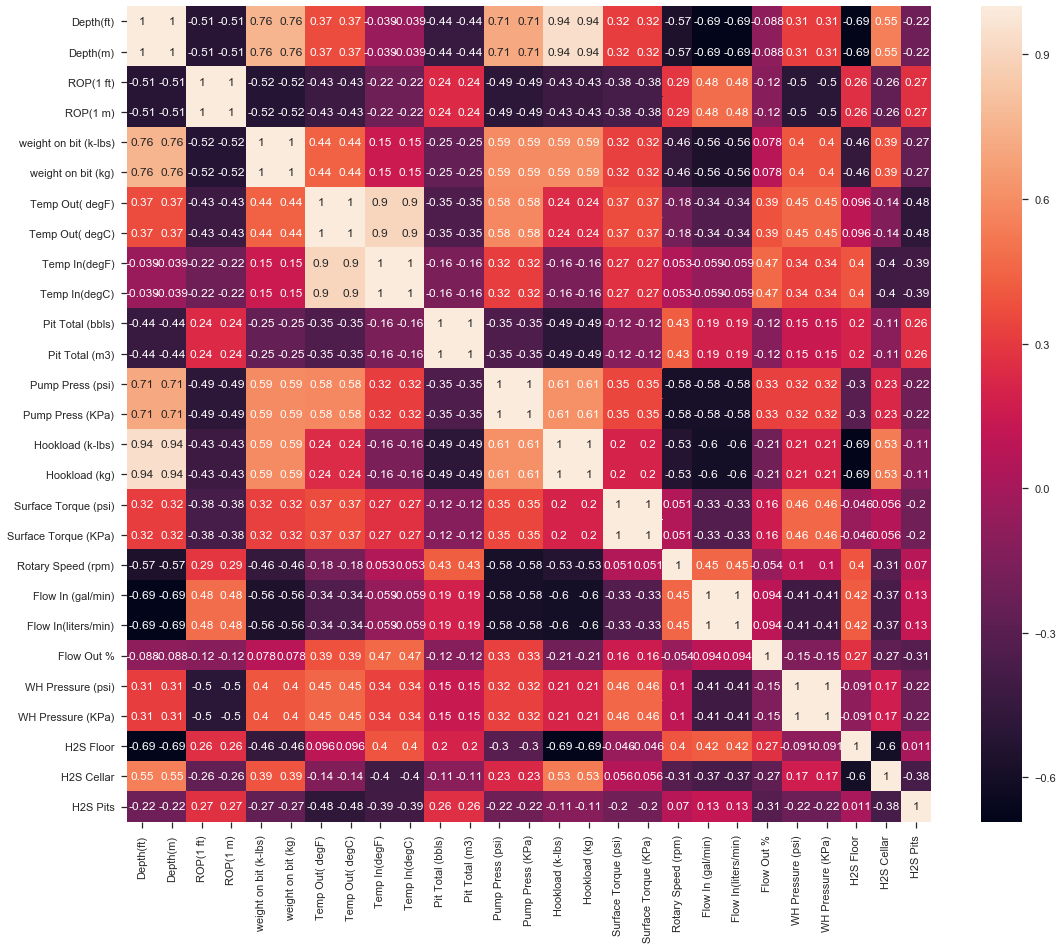

In [50]:
# Multivariate Ananlysis
plt.figure(figsize=(18, 15))
sns.heatmap(data_well.corr(), annot=True)
plt.show()

There exist collinearity amongst some variables

### 3. Data Preparation

* Data Cleaning

In [51]:
data_well.isna().sum()

Depth(ft)                0
Depth(m)                 0
ROP(1 ft)                0
ROP(1 m)                 0
weight on bit (k-lbs)    0
weight on bit (kg)       0
Temp Out( degF)          0
Temp Out( degC)          0
Temp In(degF)            0
Temp In(degC)            0
Pit Total (bbls)         0
Pit Total (m3)           0
Pump Press (psi)         0
Pump Press (KPa)         0
Hookload (k-lbs)         0
Hookload (kg)            0
Surface Torque (psi)     0
Surface Torque (KPa)     0
Rotary Speed (rpm)       0
Flow In (gal/min)        0
Flow In(liters/min)      0
Flow Out %               0
WH Pressure (psi)        0
WH Pressure (KPa)        0
H2S Floor                0
H2S Cellar               0
H2S Pits                 0
dtype: int64

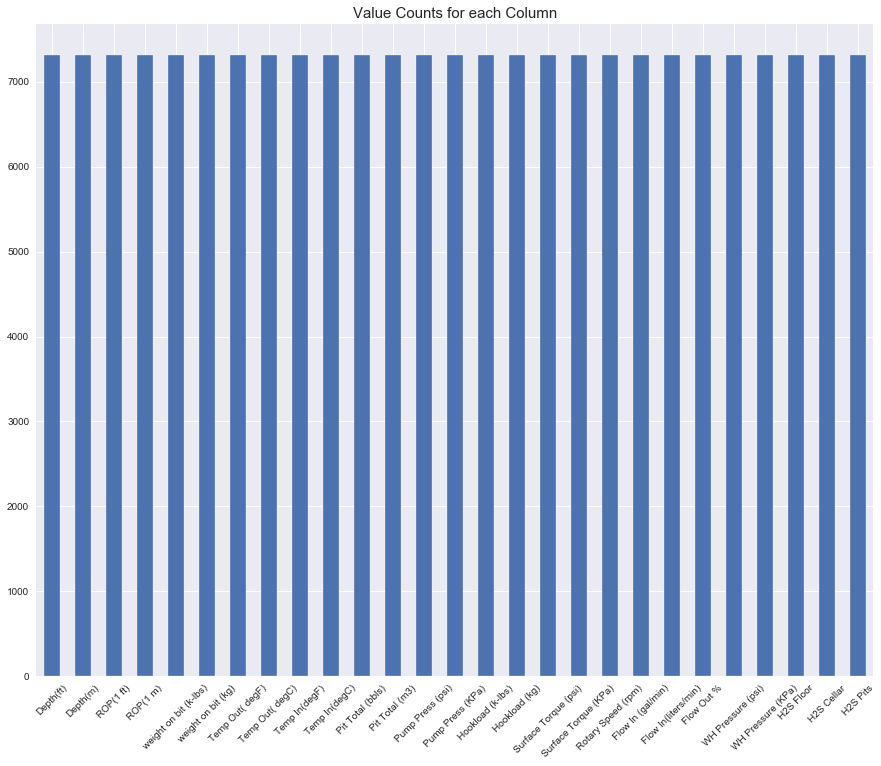

In [52]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 12))
plt.title('Value Counts for each Column', fontsize=15)
data_well.count().plot(kind='bar')
plt.tick_params(axis='x', labelrotation=45)

* Feature Selection

In [53]:
data_well.columns

Index(['Depth(ft)', 'Depth(m)', 'ROP(1 ft)', 'ROP(1 m)',
       'weight on bit (k-lbs)', 'weight on bit (kg)', 'Temp Out( degF)',
       'Temp Out( degC)', 'Temp In(degF)', 'Temp In(degC)', 'Pit Total (bbls)',
       'Pit Total (m3)', 'Pump Press (psi)', 'Pump Press (KPa)',
       'Hookload (k-lbs)', 'Hookload (kg)', 'Surface Torque (psi)',
       'Surface Torque (KPa)', 'Rotary Speed (rpm)', 'Flow In (gal/min)',
       'Flow In(liters/min)', 'Flow Out %', 'WH Pressure (psi)',
       'WH Pressure (KPa)', 'H2S Floor', 'H2S Cellar', 'H2S Pits'],
      dtype='object')

In [54]:
well_df = data_well[['Depth(ft)', 'ROP(1 ft)', 'Pump Press (psi)', 'weight on bit (k-lbs)', 'Surface Torque (psi)', 'Rotary Speed (rpm)', 'Flow In (gal/min)']]

In [55]:
well_df.head()

,Depth(ft),ROP(1 ft),Pump Press (psi),weight on bit (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Flow In (gal/min)
0,85.18,56.80,463.72,0.0,8.93,151.09,1109.58
1,86.18,61.14,459.53,0.0,8.93,151.09,1108.36
2,87.23,18.58,454.57,0.0,9.01,61.54,1102.87
3,88.26,38.29,451.14,0.0,8.97,60.23,1101.04
4,89.36,394.38,456.09,0.0,8.97,61.75,1102.46


In [56]:
well_df = well_df.rename(columns={'Depth(ft)': 'DEPTH', 'ROP(1 ft)': 'ROP', 'Pump Press (psi)': 'Pump_Pressure' ,'weight on bit (k-lbs)': 'WOB',
                                 'Surface Torque (psi)': 'Torque', 'Rotary Speed (rpm)': 'RPM', 'Flow In (gal/min)': 'Flow_Rate'})

In [57]:
well_df.head()

,DEPTH,ROP,Pump_Pressure,WOB,Torque,RPM,Flow_Rate
0,85.18,56.80,463.72,0.0,8.93,151.09,1109.58
1,86.18,61.14,459.53,0.0,8.93,151.09,1108.36
2,87.23,18.58,454.57,0.0,9.01,61.54,1102.87
3,88.26,38.29,451.14,0.0,8.97,60.23,1101.04
4,89.36,394.38,456.09,0.0,8.97,61.75,1102.46


### Merging the Log Data and Drilling Data

In [58]:
# Log data
log_data = data.copy()

log_data.head()

,DEPTH,GR,RHOB,NPHI,SP,Lithology,Lithology_hc
78,49.5,39.2458,2.5055,0.4427,67.2656,2,2
79,50.0,40.4446,2.5265,0.4136,68.4375,2,2
80,50.5,41.3580,2.5242,0.4147,68.4375,2,2
81,51.0,40.5589,2.5129,0.4529,68.8281,2,2
82,51.5,42.3286,2.5130,0.4516,69.6875,2,2


In [59]:
# Drilling Data
drilling_data = well_df.copy()

drilling_data.head()

,DEPTH,ROP,Pump_Pressure,WOB,Torque,RPM,Flow_Rate
0,85.18,56.80,463.72,0.0,8.93,151.09,1109.58
1,86.18,61.14,459.53,0.0,8.93,151.09,1108.36
2,87.23,18.58,454.57,0.0,9.01,61.54,1102.87
3,88.26,38.29,451.14,0.0,8.97,60.23,1101.04
4,89.36,394.38,456.09,0.0,8.97,61.75,1102.46


In [60]:
#Approximating the depths to the nearest whole number
log_data['DEPTH'] = np.ceil(log_data['DEPTH'])

drilling_data['DEPTH'] =np.ceil(drilling_data['DEPTH'])


In [61]:
# Merging the two data

merged_data = pd.merge(drilling_data, log_data, left_on='DEPTH', right_on='DEPTH')

merged_data.head()

,DEPTH,ROP,Pump_Pressure,WOB,Torque,RPM,Flow_Rate,GR,RHOB,NPHI,SP,Lithology,Lithology_hc
0,86.0,56.80,463.72,0.0,8.93,151.09,1109.58,38.1325,2.3715,0.6968,77.5000,2,2
1,86.0,56.80,463.72,0.0,8.93,151.09,1109.58,36.8197,2.3666,0.7407,77.5000,2,2
2,87.0,61.14,459.53,0.0,8.93,151.09,1108.36,43.2417,2.3713,0.7817,77.5000,2,2
3,87.0,61.14,459.53,0.0,8.93,151.09,1108.36,44.3262,2.3661,0.7992,77.1094,2,2
4,88.0,18.58,454.57,0.0,9.01,61.54,1102.87,43.4414,2.3620,0.8064,76.9444,2,2


In [62]:
# Dropping Dupplicates
merged_data = merged_data.drop_duplicates(subset=['DEPTH'])

In [63]:
merged_data.head()

,DEPTH,ROP,Pump_Pressure,WOB,Torque,RPM,Flow_Rate,GR,RHOB,NPHI,SP,Lithology,Lithology_hc
0,86.0,56.80,463.72,0.0,8.93,151.09,1109.58,38.1325,2.3715,0.6968,77.5000,2,2
2,87.0,61.14,459.53,0.0,8.93,151.09,1108.36,43.2417,2.3713,0.7817,77.5000,2,2
4,88.0,18.58,454.57,0.0,9.01,61.54,1102.87,43.4414,2.3620,0.8064,76.9444,2,2
6,89.0,38.29,451.14,0.0,8.97,60.23,1101.04,41.9004,2.3765,0.6961,76.8750,2,2
8,90.0,394.38,456.09,0.0,8.97,61.75,1102.46,36.7343,2.3705,0.7365,77.1094,2,2


In [64]:
merged_data.isna().sum()

DEPTH            0
ROP              0
Pump_Pressure    0
WOB              0
Torque           0
RPM              0
Flow_Rate        0
GR               0
RHOB             0
NPHI             0
SP               0
Lithology        0
Lithology_hc     0
dtype: int64

In [65]:
# Selecting the input data
X = merged_data.iloc[:, :-2]
X.head()

,DEPTH,ROP,Pump_Pressure,WOB,Torque,RPM,Flow_Rate,GR,RHOB,NPHI,SP
0,86.0,56.80,463.72,0.0,8.93,151.09,1109.58,38.1325,2.3715,0.6968,77.5000
2,87.0,61.14,459.53,0.0,8.93,151.09,1108.36,43.2417,2.3713,0.7817,77.5000
4,88.0,18.58,454.57,0.0,9.01,61.54,1102.87,43.4414,2.3620,0.8064,76.9444
6,89.0,38.29,451.14,0.0,8.97,60.23,1101.04,41.9004,2.3765,0.6961,76.8750
8,90.0,394.38,456.09,0.0,8.97,61.75,1102.46,36.7343,2.3705,0.7365,77.1094


In [66]:
# standardizing the input variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_std = ss.fit_transform(X)

In [67]:
y = merged_data.iloc[:, -2:-1]
y.head()

,Lithology
0,2
2,2
4,2
6,2
8,2


In [68]:
X_std.shape

(7113, 11)

In [69]:
y.shape

(7113, 1)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

### Model 1- Support Vector Machine (SVM)

C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9929725931131412
F1_Score: [0.98947368 0.9944664  0.99449036]
Precision_Score: [0.99764151 0.99055118 0.99175824]
recall_Score: [0.98143852 0.9984127  0.99723757]
______________________________

Confusion Matrix: 
[[423   6   2]
 [  0 629   1]
 [  1   0 361]]
______________________________

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       431
           1       0.99      1.00      0.99       630
           2       0.99      1.00      0.99       362

    accuracy                           0.99      1423
   macro avg       0.99      0.99      0.99      1423
weighted avg       0.99      0.99      0.99      1423



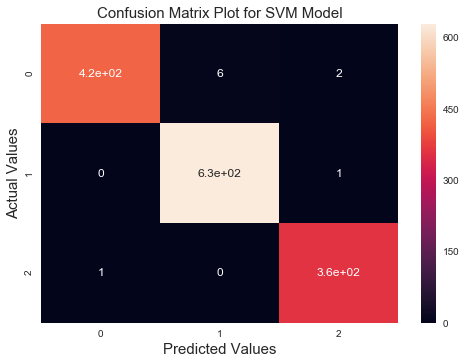

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 


svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'F1_Score: {f1_score(y_test, y_pred_svm, average=None)}')
print(f'Precision_Score: {precision_score(y_test, y_pred_svm, average=None)}')
print(f'recall_Score: {recall_score(y_test, y_pred_svm, average=None)}')
print('______________________________\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_svm)}')
print('______________________________\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_svm)}')

# Plotting the Confusion matrix for SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True)
plt.title('Confusion Matrix Plot for SVM Model', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.show()

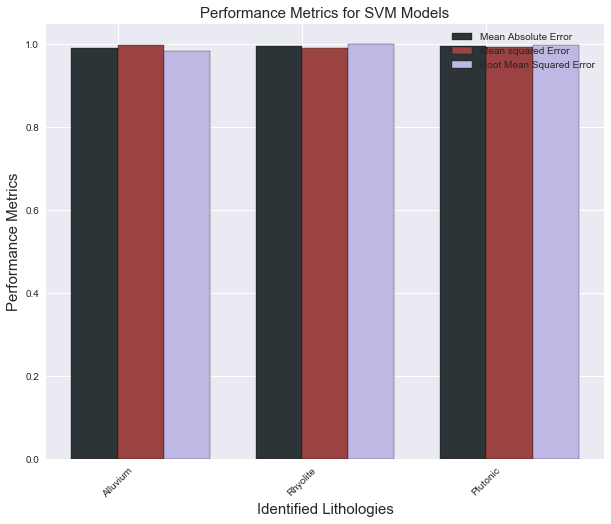

In [72]:
# Barplots of the Performance

Lithologies = ['Alluvium', 'Rhyolite', 'Plutonic']

F1_score = list(f1_score(y_test, y_pred_svm, average=None))
Precision_score = list(precision_score(y_test, y_pred_svm, average=None))
Recall_score = list(recall_score(y_test, y_pred_svm, average=None))

n = 3
r = np.arange(n)
width = 0.25
plt.figure(figsize=(10, 8))
plt.bar(r, F1_score, color = '#2D3437', width=width, edgecolor = 'black', label = 'Mean Absolute Error')
plt.bar(r+width, Precision_score, color = '#9B4343', width=width, edgecolor = 'black', label = 'Mean squared Error')
plt.bar(r+width*2, Recall_score, color = '#BEB9E4', width=width, edgecolor = 'black', label = 'Root Mean Squared Error')

plt.xlabel('Identified Lithologies', fontsize=15)
plt.ylabel('Performance Metrics', fontsize=15)
plt.title('Performance Metrics for SVM Models', fontsize=15)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Lithologies)
plt.legend(loc='best')
  
plt.show()

### Model 2- Logistic Regression

C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9936753338018272
F1_Score: [0.98949825 0.9944664  0.99723757]
Precision_Score: [0.99530516 0.99055118 0.99723757]
recall_Score: [0.9837587  0.9984127  0.99723757]
______________________________

Confusion Matrix: 
[[424   6   1]
 [  1 629   0]
 [  1   0 361]]
______________________________

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       431
           1       0.99      1.00      0.99       630
           2       1.00      1.00      1.00       362

    accuracy                           0.99      1423
   macro avg       0.99      0.99      0.99      1423
weighted avg       0.99      0.99      0.99      1423



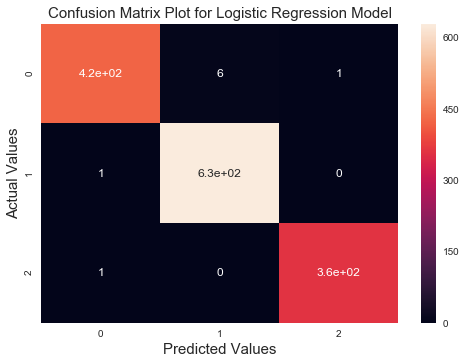

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'F1_Score: {f1_score(y_test, y_pred_lr, average=None)}')
print(f'Precision_Score: {precision_score(y_test, y_pred_lr, average=None)}')
print(f'recall_Score: {recall_score(y_test, y_pred_lr, average=None)}')
print('______________________________\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_lr)}')
print('______________________________\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_lr)}')

# Plotting the Confusion matrix for Logitic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True)
plt.title('Confusion Matrix Plot for Logistic Regression Model', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.show()

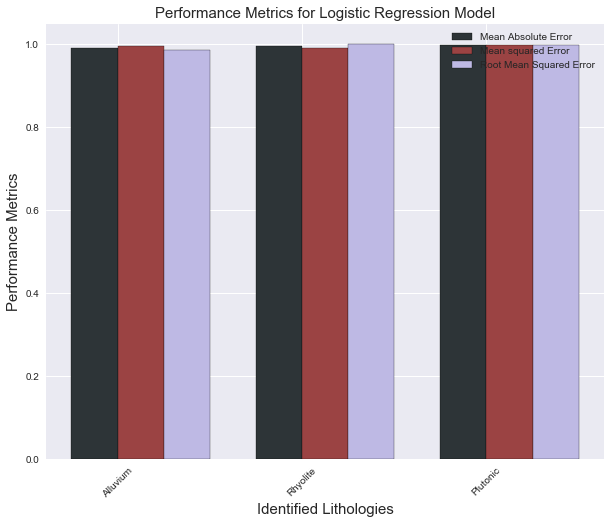

In [74]:
# Barplots of the Performance

Lithologies = ['Alluvium', 'Rhyolite', 'Plutonic']

F1_score = list(f1_score(y_test, y_pred_lr, average=None))
Precision_score = list(precision_score(y_test, y_pred_lr, average=None))
Recall_score = list(recall_score(y_test, y_pred_lr, average=None))

n = 3
r = np.arange(n)
width = 0.25
plt.figure(figsize=(10, 8))
plt.bar(r, F1_score, color = '#2D3437', width=width, edgecolor = 'black', label = 'Mean Absolute Error')
plt.bar(r+width, Precision_score, color = '#9B4343', width=width, edgecolor = 'black', label = 'Mean squared Error')
plt.bar(r+width*2, Recall_score, color = '#BEB9E4', width=width, edgecolor = 'black', label = 'Root Mean Squared Error')

plt.xlabel('Identified Lithologies', fontsize=15)
plt.ylabel('Performance Metrics', fontsize=15)
plt.title('Performance Metrics for Logistic Regression Model', fontsize=15)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Lithologies)
plt.legend(loc='best')
  
plt.show()

### Model 3 - Random Forest 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy: 0.9964862965565706
F1_Score: [0.99417928 0.99604117 1.        ]
Precision_Score: [0.99766355 0.99368088 1.        ]
recall_Score: [0.99071926 0.9984127  1.        ]
______________________________

Confusion Matrix: 
[[427   4   0]
 [  1 629   0]
 [  0   0 362]]
______________________________

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       431
           1       0.99      1.00      1.00       630
           2       1.00      1.00      1.00       362

    accuracy                           1.00      1423
   macro avg       1.00      1.00      1.00      1423
weighted avg       1.00      1.00      1.00      1423



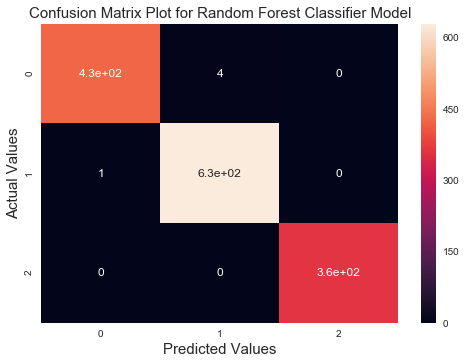

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'F1_Score: {f1_score(y_test, y_pred_rf, average=None)}')
print(f'Precision_Score: {precision_score(y_test, y_pred_rf, average=None)}')
print(f'recall_Score: {recall_score(y_test, y_pred_rf, average=None)}')
print('______________________________\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rf)}')
print('______________________________\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_rf)}')

# Plotting the Confusion matrix for RF
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
plt.title('Confusion Matrix Plot for Random Forest Classifier Model', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.show()

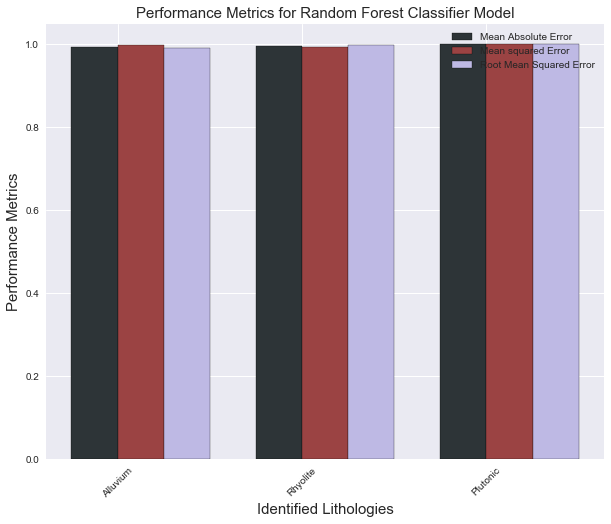

In [76]:
# Barplots of the Performance

Lithologies = ['Alluvium', 'Rhyolite', 'Plutonic']

F1_score = list(f1_score(y_test, y_pred_rf, average=None))
Precision_score = list(precision_score(y_test, y_pred_rf, average=None))
Recall_score = list(recall_score(y_test, y_pred_rf, average=None))

n = 3
r = np.arange(n)
width = 0.25
plt.figure(figsize=(10, 8))
plt.bar(r, F1_score, color = '#2D3437', width=width, edgecolor = 'black', label = 'Mean Absolute Error')
plt.bar(r+width, Precision_score, color = '#9B4343', width=width, edgecolor = 'black', label = 'Mean squared Error')
plt.bar(r+width*2, Recall_score, color = '#BEB9E4', width=width, edgecolor = 'black', label = 'Root Mean Squared Error')

plt.xlabel('Identified Lithologies', fontsize=15)
plt.ylabel('Performance Metrics', fontsize=15)
plt.title('Performance Metrics for Random Forest Classifier Model', fontsize=15)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Lithologies)
plt.legend(loc='best')
  
plt.show()

### Model 4 - K-Nearest Neighbor

C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9915671117357695
F1_Score: [0.98604651 0.99207607 0.99723757]
Precision_Score: [0.98834499 0.99050633 0.99723757]
recall_Score: [0.9837587  0.99365079 0.99723757]
______________________________

Confusion Matrix: 
[[424   6   1]
 [  4 626   0]
 [  1   0 361]]
______________________________

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       431
           1       0.99      0.99      0.99       630
           2       1.00      1.00      1.00       362

    accuracy                           0.99      1423
   macro avg       0.99      0.99      0.99      1423
weighted avg       0.99      0.99      0.99      1423



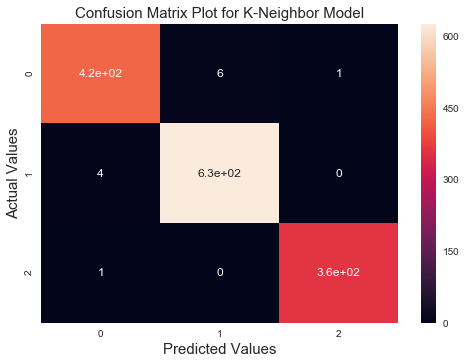

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)

y_pred_kn = kn_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_kn)}')
print(f'F1_Score: {f1_score(y_test, y_pred_kn, average=None)}')
print(f'Precision_Score: {precision_score(y_test, y_pred_kn, average=None)}')
print(f'recall_Score: {recall_score(y_test, y_pred_kn, average=None)}')
print('______________________________\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_kn)}')
print('______________________________\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_kn)}')

# Plotting the Confusion matrix for kn
sns.heatmap(confusion_matrix(y_test, y_pred_kn), annot=True)
plt.title('Confusion Matrix Plot for K-Neighbor Model', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.show()

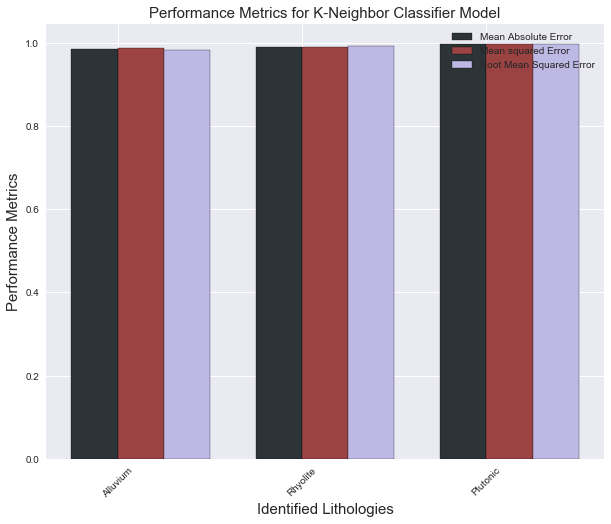

In [78]:
# Barplots of the Performance

Lithologies = ['Alluvium', 'Rhyolite', 'Plutonic']

F1_score = list(f1_score(y_test, y_pred_kn, average=None))
Precision_score = list(precision_score(y_test, y_pred_kn, average=None))
Recall_score = list(recall_score(y_test, y_pred_kn, average=None))

n = 3
r = np.arange(n)
width = 0.25
plt.figure(figsize=(10, 8))
plt.bar(r, F1_score, color = '#2D3437', width=width, edgecolor = 'black', label = 'Mean Absolute Error')
plt.bar(r+width, Precision_score, color = '#9B4343', width=width, edgecolor = 'black', label = 'Mean squared Error')
plt.bar(r+width*2, Recall_score, color = '#BEB9E4', width=width, edgecolor = 'black', label = 'Root Mean Squared Error')

plt.xlabel('Identified Lithologies', fontsize=15)
plt.ylabel('Performance Metrics', fontsize=15)
plt.title('Performance Metrics for K-Neighbor Classifier Model', fontsize=15)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Lithologies)
plt.legend(loc='best')
  
plt.show()

### Model 5 - MultiLayer Perceptron 

C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9985945186226283
F1_Score: [0.99767981 0.99920698 0.99861687]
Precision_Score: [0.99767981 0.99841521 1.        ]
recall_Score: [0.99767981 1.         0.99723757]
______________________________

Confusion Matrix: 
[[430   1   0]
 [  0 630   0]
 [  1   0 361]]
______________________________

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       1.00      1.00      1.00       630
           2       1.00      1.00      1.00       362

    accuracy                           1.00      1423
   macro avg       1.00      1.00      1.00      1423
weighted avg       1.00      1.00      1.00      1423



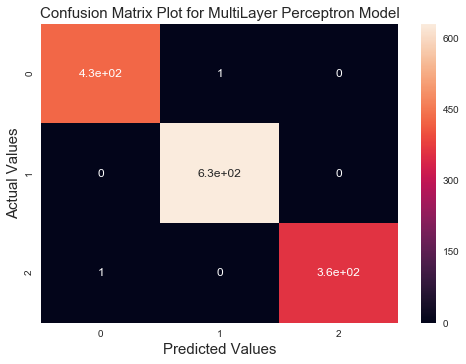

In [79]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ml_model = MLPClassifier()
ml_model.fit(X_train, y_train)

y_pred_ml = ml_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_ml)}')
print(f'F1_Score: {f1_score(y_test, y_pred_ml, average=None)}')
print(f'Precision_Score: {precision_score(y_test, y_pred_ml, average=None)}')
print(f'recall_Score: {recall_score(y_test, y_pred_ml, average=None)}')
print('______________________________\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_ml)}')
print('______________________________\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_ml)}')

# Plotting the Confusion matrix for MLP
sns.heatmap(confusion_matrix(y_test, y_pred_ml), annot=True)
plt.title('Confusion Matrix Plot for MultiLayer Perceptron Model', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.show()

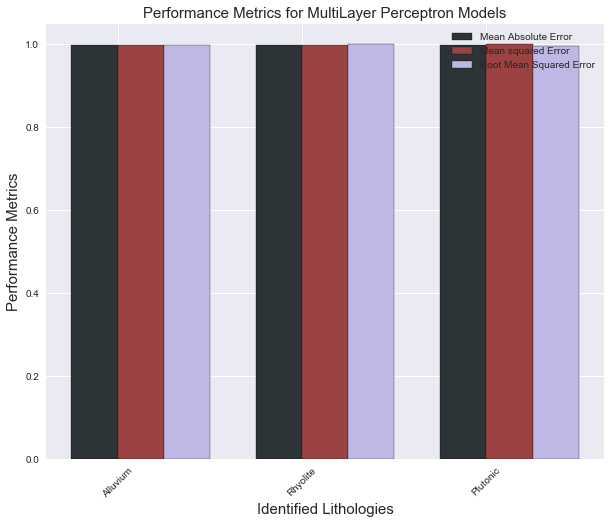

In [80]:
# Barplots of the Performance

Lithologies = ['Alluvium', 'Rhyolite', 'Plutonic']

F1_score = list(f1_score(y_test, y_pred_ml, average=None))
Precision_score = list(precision_score(y_test, y_pred_ml, average=None))
Recall_score = list(recall_score(y_test, y_pred_ml, average=None))

n = 3
r = np.arange(n)
width = 0.25
plt.figure(figsize=(10, 8))
plt.bar(r, F1_score, color = '#2D3437', width=width, edgecolor = 'black', label = 'Mean Absolute Error')
plt.bar(r+width, Precision_score, color = '#9B4343', width=width, edgecolor = 'black', label = 'Mean squared Error')
plt.bar(r+width*2, Recall_score, color = '#BEB9E4', width=width, edgecolor = 'black', label = 'Root Mean Squared Error')

plt.xlabel('Identified Lithologies', fontsize=15)
plt.ylabel('Performance Metrics', fontsize=15)
plt.title('Performance Metrics for MultiLayer Perceptron Models', fontsize=15)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Lithologies)
plt.legend(loc='best')
  
plt.show()

### Roc Plot for classification models

In [81]:
from sklearn.metrics import roc_curve

# roc curve models
fpr_svm, tpr_svm, thresh_svm = roc_curve(y_test, y_pred_svm, pos_label=1)
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, y_pred_lr, pos_label=1)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_pred_rf, pos_label=1)
fpr_kn, tpr_kn, thresh_kn = roc_curve(y_test, y_pred_kn, pos_label=1)
fpr_ml, tpr_ml, thresh_ml = roc_curve(y_test, y_pred_ml, pos_label=1)

# roc curve for tpr = fpr
random_probs = [i for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

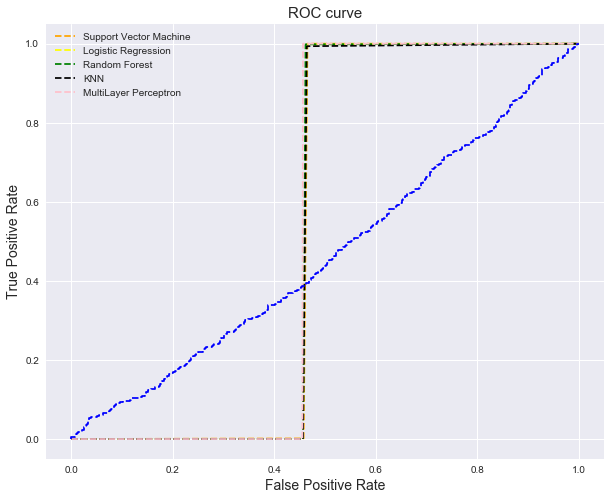

In [82]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_svm, tpr_svm, linestyle='--', color='orange', label='Support Vector Machine')
plt.plot(fpr_lr, tpr_lr, linestyle='--', color='yellow', label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, linestyle='--', color='green', label='Random Forest')
plt.plot(fpr_kn, tpr_kn, linestyle='--', color='black', label='KNN')
plt.plot(fpr_ml, tpr_ml, linestyle='--', color='pink', label='MultiLayer Perceptron')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best')
plt.show()

### Hybrid Model- Voting Classifier

C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9971890372452565
F1_Score: [0.99534884 0.99841521 0.99723757]
Precision_Score: [0.997669   0.99683544 0.99723757]
recall_Score: [0.99303944 1.         0.99723757]
______________________________

Confusion Matrix: 
[[428   2   1]
 [  0 630   0]
 [  1   0 361]]
______________________________

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       431
           1       1.00      1.00      1.00       630
           2       1.00      1.00      1.00       362

    accuracy                           1.00      1423
   macro avg       1.00      1.00      1.00      1423
weighted avg       1.00      1.00      1.00      1423



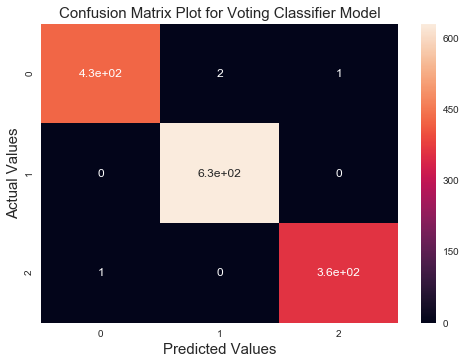

In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Training Classifier
clf1 = SVC(probability=True)
clf2 = LogisticRegression()
clf3 = RandomForestClassifier()
clf4 = KNeighborsClassifier()
clf5 = MLPClassifier()

vclf = VotingClassifier(estimators=[('SVM', clf1), ('LR', clf2), ('rf', clf3), ('kn', clf4), ('ml', clf5)], voting='soft', flatten_transform=True, verbose=False, weights=[1, 1, 1, 1, 1])
vclf.fit(X_train, y_train)

y_pred_vc = vclf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_vc)}')
print(f'F1_Score: {f1_score(y_test, y_pred_vc, average=None)}')
print(f'Precision_Score: {precision_score(y_test, y_pred_vc, average=None)}')
print(f'recall_Score: {recall_score(y_test, y_pred_vc, average=None)}')
print('______________________________\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_vc)}')
print('______________________________\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_vc)}')

# Plotting the Confusion matrix for Voting Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_vc), annot=True)
plt.title('Confusion Matrix Plot for Voting Classifier Model', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.show()


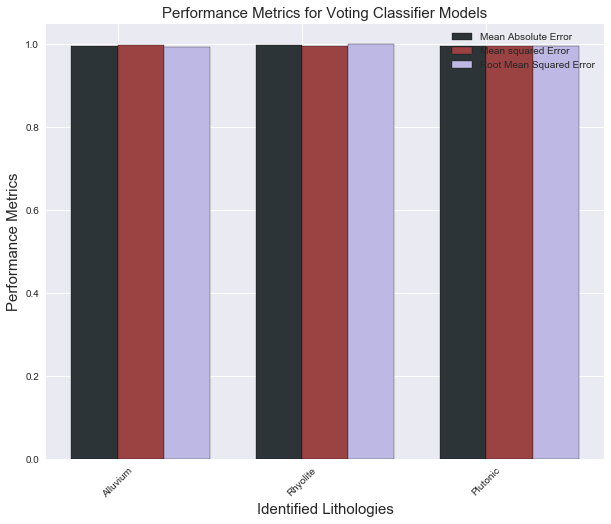

In [84]:
# Barplots of the Performance

Lithologies = ['Alluvium', 'Rhyolite', 'Plutonic']

F1_score = list(f1_score(y_test, y_pred_vc, average=None))
Precision_score = list(precision_score(y_test, y_pred_vc, average=None))
Recall_score = list(recall_score(y_test, y_pred_vc, average=None))

n = 3
r = np.arange(n)
width = 0.25
plt.figure(figsize=(10, 8))
plt.bar(r, F1_score, color = '#2D3437', width=width, edgecolor = 'black', label = 'Mean Absolute Error')
plt.bar(r+width, Precision_score, color = '#9B4343', width=width, edgecolor = 'black', label = 'Mean squared Error')
plt.bar(r+width*2, Recall_score, color = '#BEB9E4', width=width, edgecolor = 'black', label = 'Root Mean Squared Error')

plt.xlabel('Identified Lithologies', fontsize=15)
plt.ylabel('Performance Metrics', fontsize=15)
plt.title('Performance Metrics for Voting Classifier Models', fontsize=15)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Lithologies)
plt.legend(loc='best')
  
plt.show()

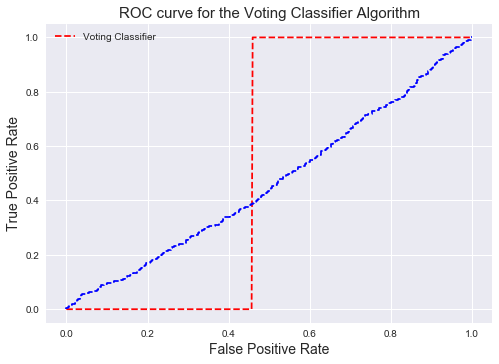

In [85]:
fpr_vc, tpr_vc, thresh_vc = roc_curve(y_test, y_pred_vc, pos_label=1)
plt.plot(fpr_vc, tpr_vc, linestyle='--', color='red', label='Voting Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve for the Voting Classifier Algorithm', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best')
plt.show()

### Accuracy Plot

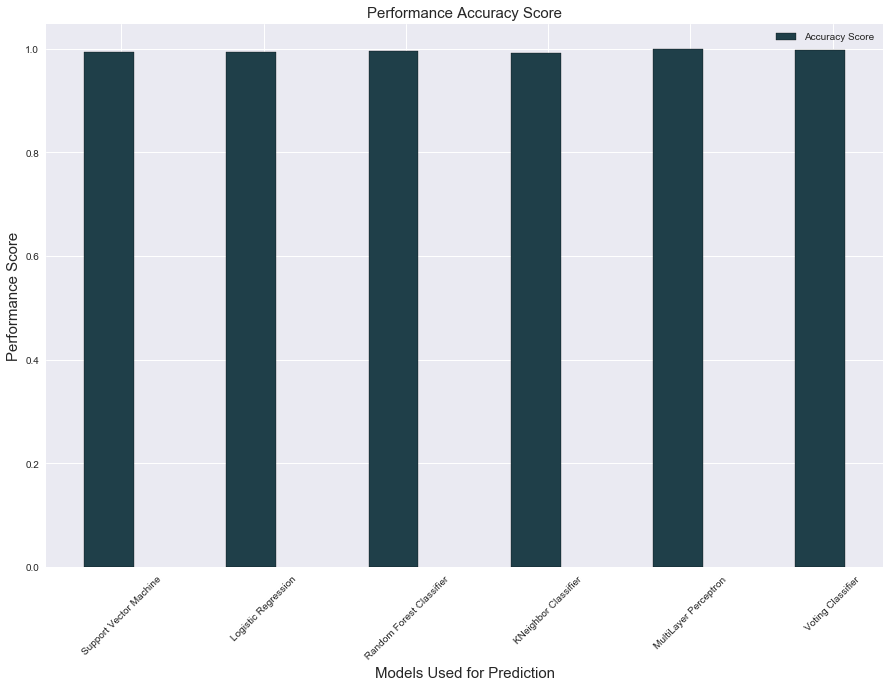

In [86]:
Models = ['Support Vector Machine', 'Logistic Regression', ' Random Forest Classifier', 'KNeighbor Classifier', 
          'MultiLayer Perceptron', 'Voting Classifier']

Accuracy = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf),
           accuracy_score(y_test, y_pred_kn), accuracy_score(y_test, y_pred_ml), accuracy_score(y_test, y_pred_vc)]

n = 6
r = np.arange(n)
width = 0.35
plt.figure(figsize=(15, 10))
plt.bar(r, Accuracy, color='#1F3F49', width=width, edgecolor = 'black', label = 'Accuracy Score')

plt.xlabel('Models Used for Prediction', fontsize=15)
plt.ylabel('Performance Score', fontsize=15)
plt.title('Performance Accuracy Score', fontsize=15)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/4, Models)
plt.legend()
  
plt.show()